In [32]:
import string
import re
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d zarajamshaid/language-identification-datasst

Dataset URL: https://www.kaggle.com/datasets/zarajamshaid/language-identification-datasst
License(s): DbCL-1.0
 54% 3.00M/5.53M [00:00<00:00, 5.74MB/s]
100% 5.53M/5.53M [00:00<00:00, 8.04MB/s]


In [5]:
from zipfile import ZipFile

dataset = '/content/language-identification-datasst.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
df = pd.read_csv('/content/dataset.csv')

In [7]:
df.head(10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [8]:
df.shape

(22000, 2)

In [9]:
df['language'].value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('language',axis=1)

In [12]:
X = df['Text']
X

0        klement gottwaldi surnukeha palsameeriti ning ...
1        sebes joseph pereira thomas  på eng the jesuit...
2        ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3        விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4        de spons behoort tot het geslacht haliclona en...
                               ...                        
21995    hors du terrain les années  et  sont des année...
21996    ใน พศ  หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...
21997    con motivo de la celebración del septuagésimoq...
21998    年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...
21999     aprilie sonda spațială messenger a nasa și-a ...
Name: Text, Length: 22000, dtype: object

In [13]:
X.head(5)

0    klement gottwaldi surnukeha palsameeriti ning ...
1    sebes joseph pereira thomas  på eng the jesuit...
2    ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3    விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4    de spons behoort tot het geslacht haliclona en...
Name: Text, dtype: object

In [14]:
y = df['language']

In [15]:
y.head(5)

0    Estonian
1     Swedish
2        Thai
3       Tamil
4       Dutch
Name: language, dtype: object

In [16]:
def clean_txt(text):
    text=text.lower()
    text=re.sub(r'[^\w\s]',' ',text)
    text=re.sub(r'[_0-9]',' ',text)
    text=re.sub(r'\s\s+',' ',text)
    return text

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [18]:
X_train.shape

(15400,)

In [19]:
y_train.shape

(15400,)

In [20]:
X_train = [clean_txt(text) for text in tqdm(X_train)]
X_test = [clean_txt(text) for text in tqdm(X_test)]

100%|██████████| 6600/6600 [00:00<00:00, 7054.59it/s]


In [21]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [23]:
model = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [25]:
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [27]:
pred = model.predict(X_test)

In [29]:
accuracy = (metrics.accuracy_score(y_test, pred))*100
print('The MultinomialNB has :',accuracy,'% accuracy')

The MultinomialNB has : 97.57575757575758 % accuracy


In [30]:
unique_decoded_languages = sorted(df["language"].unique())
unique_decoded_languages

['Arabic',
 'Chinese',
 'Dutch',
 'English',
 'Estonian',
 'French',
 'Hindi',
 'Indonesian',
 'Japanese',
 'Korean',
 'Latin',
 'Persian',
 'Portugese',
 'Pushto',
 'Romanian',
 'Russian',
 'Spanish',
 'Swedish',
 'Tamil',
 'Thai',
 'Turkish',
 'Urdu']

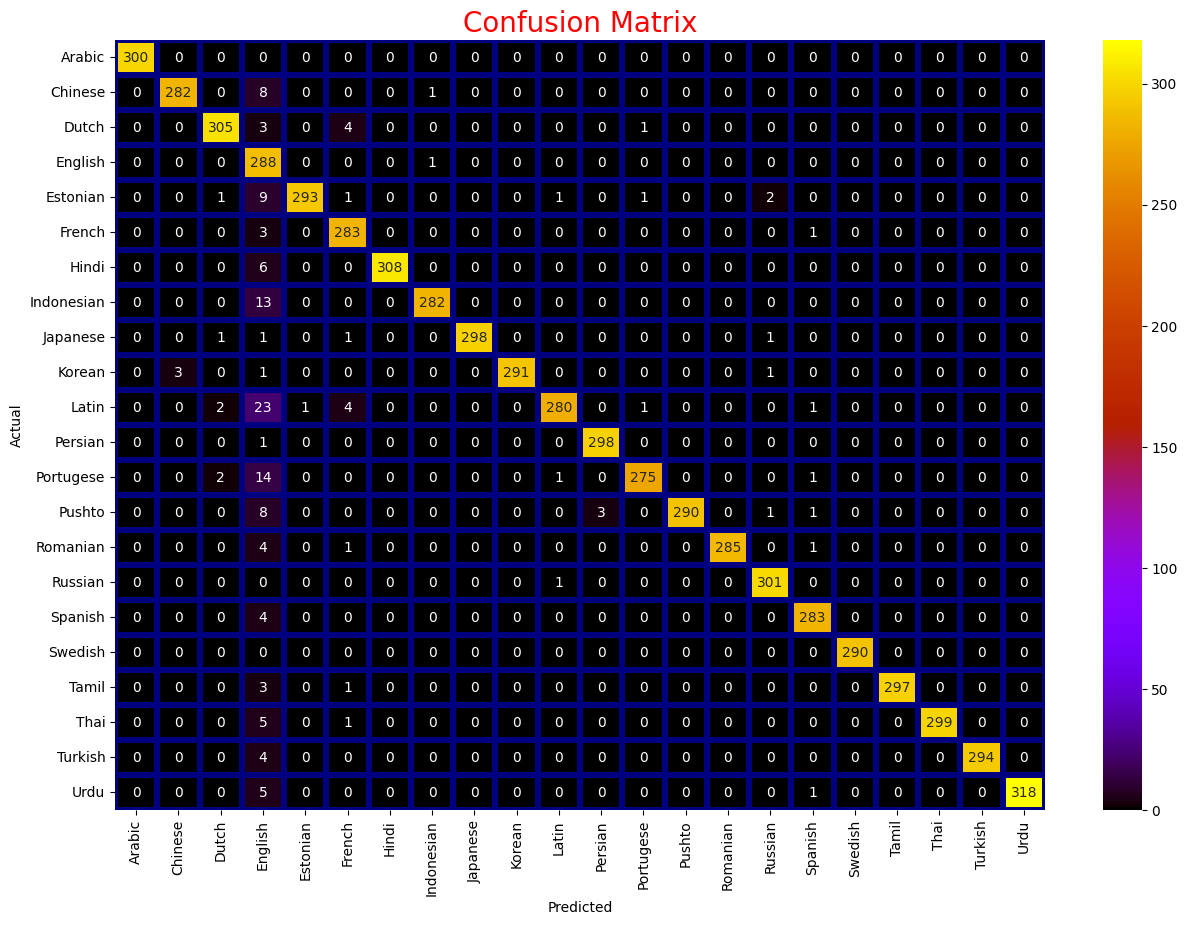

In [33]:
cf=confusion_matrix(y_test,pred)
label_name=unique_decoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="gnuplot",
           linewidths=3, linecolor='navy')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
print(classification_report(y_test,pred,target_names=label_name))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       300
     Chinese       0.99      0.97      0.98       291
       Dutch       0.98      0.97      0.98       313
     English       0.71      1.00      0.83       289
    Estonian       1.00      0.95      0.97       308
      French       0.96      0.99      0.97       287
       Hindi       1.00      0.98      0.99       314
  Indonesian       0.99      0.96      0.97       295
    Japanese       1.00      0.99      0.99       302
      Korean       1.00      0.98      0.99       296
       Latin       0.99      0.90      0.94       312
     Persian       0.99      1.00      0.99       299
   Portugese       0.99      0.94      0.96       293
      Pushto       1.00      0.96      0.98       303
    Romanian       1.00      0.98      0.99       291
     Russian       0.98      1.00      0.99       302
     Spanish       0.98      0.99      0.98       287
     Swedish       1.00    

In [46]:
import pickle

In [47]:
MODEL = open('Languagemodel.pkl', 'wb')
pickle.dump(model, MODEL)

In [38]:
def predict(text):
    pred = model.predict([clean_txt(text)])
    return pred[0]

In [39]:
predict('my name is shubham')

'English'

In [42]:
predict('Tu dois arrêter de courir.')

'French'

In [44]:
predict('もしもし')

'Japanese'

In [45]:
predict('祝你一天过得愉快')

'Chinese'